In [24]:
import pandas as pd

In [30]:
# Cargar el dataset
file_path = '../data/processed/df_pre-encoded.csv'
df = pd.read_csv(file_path, sep=';')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   COMUNA                                    2644 non-null   object 
 1   CANCER_PREVIO_1                           2644 non-null   object 
 2   CANCER_PREVIO_2                           2644 non-null   object 
 3   PARENTESCO_1                              2644 non-null   object 
 4   CANCER_PARENTESCO_1                       2644 non-null   object 
 5   PARENTESCO_2                              2644 non-null   object 
 6   CANCER_PARENTESCO_2                       2644 non-null   object 
 7   PARENTESCO_3                              2644 non-null   object 
 8   CANCER_PARENTESCO_3                       2644 non-null   object 
 9   MORFO_COMPLETA                            2644 non-null   object 
 10  EXTENSION_NOM                       

In [32]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Codificación de variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar las primeras filas del dataset codificado
df_encoded.head()


,DIAS_HASTA_INICIO_TRATAMIENTO,SOBREVIVE,DIAS_DESDE_NACIMIENTO_A_DIAGNO,DIAS_DESDE_INGRESO_A_DIAGNO,DIAS_DESDE_DIAGNO_A_COMITE,DIAS_DESDE_TOM_MUESTRA_A_DIAGNO,DIAS_DESDE_DIAGNO_TRATAMIENTO_2,DIAS_DESDE_TRATAMIENTO_1_A_TRATAMIENTO_2,DIAS_TRATAMIENTO_1,DIAS_TRATAMIENTO_2,...,N_N3,N_NX,M_M,M_M0,M_M0|P,M_M0|Y,M_M1,M_M1b,M_MX,M_MX|Y
0,468,0.0,29509,0,468.0,0.0,-226.0,-21.0,3260.0,56.0,...,False,False,False,True,False,False,False,False,False,False
1,97,0.0,27405,0,34.0,0.0,-226.0,-21.0,79.0,56.0,...,False,True,False,True,False,False,False,False,False,False
2,65,1.0,22430,41,2870.0,0.0,-2984.0,2919.0,0.0,55.0,...,False,False,False,True,False,False,False,False,False,False
3,55,0.0,25558,36,55.0,15.0,-226.0,-21.0,189.0,56.0,...,False,False,False,True,False,False,False,False,False,False
4,421,0.0,25984,6,441.0,0.0,-505.0,-1036.0,1120.0,61.0,...,False,False,False,True,False,False,False,False,False,False


In [33]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Eliminar la columna 'SOBREVIVE' de numeric_features
numeric_features = numeric_features.drop('SOBREVIVE')


# Normalizar los datos numéricos
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Verificar las primeras filas del dataset normalizado
df_encoded.head()


,DIAS_HASTA_INICIO_TRATAMIENTO,SOBREVIVE,DIAS_DESDE_NACIMIENTO_A_DIAGNO,DIAS_DESDE_INGRESO_A_DIAGNO,DIAS_DESDE_DIAGNO_A_COMITE,DIAS_DESDE_TOM_MUESTRA_A_DIAGNO,DIAS_DESDE_DIAGNO_TRATAMIENTO_2,DIAS_DESDE_TRATAMIENTO_1_A_TRATAMIENTO_2,DIAS_TRATAMIENTO_1,DIAS_TRATAMIENTO_2,...,N_N3,N_NX,M_M,M_M0,M_M0|P,M_M0|Y,M_M1,M_M1b,M_MX,M_MX|Y
0,0.622586,0.0,1.525265,0.458040,0.813005,-0.124685,0.186474,0.073172,9.539024,-0.176073,...,False,False,False,True,False,False,False,False,False,False
1,-0.502385,0.0,0.773702,0.458040,-0.431286,-0.124685,0.186474,0.073172,-0.142176,-0.176073,...,False,True,False,True,False,False,False,False,False,False
2,-0.599418,1.0,-1.003403,0.579836,7.699612,-0.124685,-11.288019,11.171711,-0.382609,-0.181359,...,False,False,False,True,False,False,False,False,False,False
3,-0.629740,0.0,0.113940,0.564983,-0.371079,0.180695,0.186474,0.073172,0.192603,-0.176073,...,False,False,False,True,False,False,False,False,False,False
4,0.480070,0.0,0.266111,0.475864,0.735595,-0.124685,-0.974289,-3.758467,3.026051,-0.149648,...,False,False,False,True,False,False,False,False,False,False


In [44]:
from tabulate import tabulate

def format_classification_report(report_items,modelo_name):
    # Formatear el reporte para tabulate
    report_table = []

    for label, metrics in report_items:
        if isinstance(metrics, dict):
            row = [label]
            row.extend([metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
            report_table.append(row)
        else:
            row = [label, metrics]
            report_table.append(row)

    headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    
    print(f"Classification Report for {modelo_name}")
    # Imprimir el reporte con tabulate
    print(tabulate(report_table, headers=headers, tablefmt="grid"))

In [34]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = df_encoded.drop('SOBREVIVE', axis=1)
y = df_encoded['SOBREVIVE']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Asegurarse de que la variable 'SOBREVIVE' sea categórica
y_train = y_train.astype(int)
y_test = y_test.astype(int)



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo KNN
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)


# Crear el modelo SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Entrenamiento del modelo XGBoost
modelo = XGBClassifier()
modelo.fit(X_train, y_train)

# Evaluación del Modelo XGBoost

from sklearn.metrics import f1_score, recall_score

y_pred_xgb = modelo.predict(X_test)

report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)


In [45]:
#Imprimir reporte de clasificación

format_classification_report(report_knn.items(),'KNN')
format_classification_report(report_rf.items(),'Random Forest')
format_classification_report(report_svm.items(),'SVM')
format_classification_report(report_xgb.items(),'XGBoost')

Classification Report for KNN
+--------------+-------------+----------+------------+-----------+
| Class        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0.775281 | 0.489362 |   0.6      |       141 |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.897872 | 0.969372 |   0.932253 |       653 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |    0.884131 |          |            |           |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.836577 | 0.729367 |   0.766127 |       794 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.876102 | 0.884131 |   0.873251 |       794 |
+--------------+-------------+----------+------------+-----------+
Classification Report for Random Forest
+--------------+-------------+----------+------------+-----

### Matriz de Confusión 

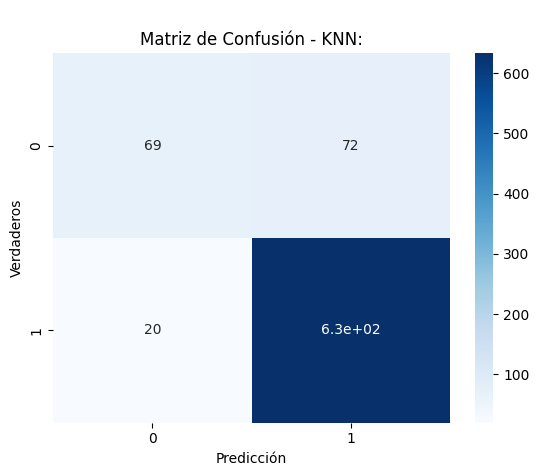

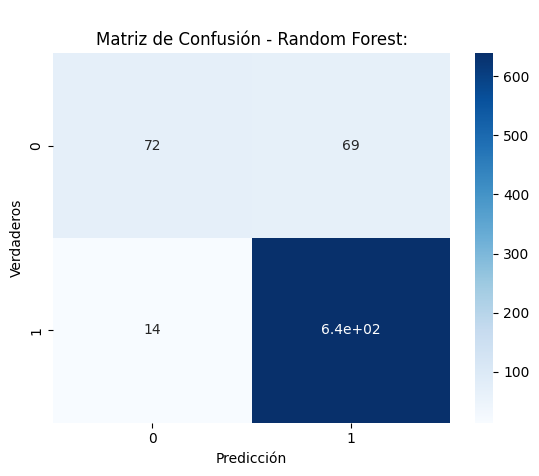

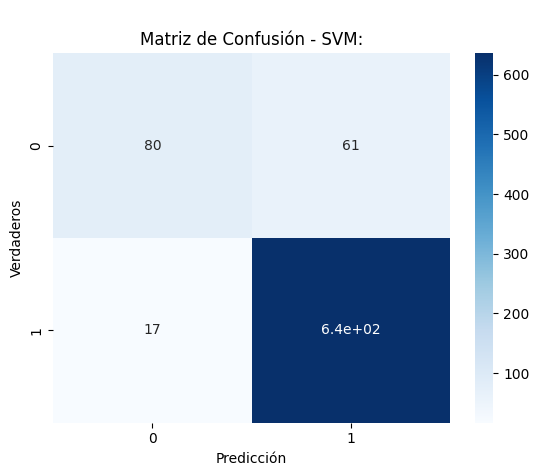

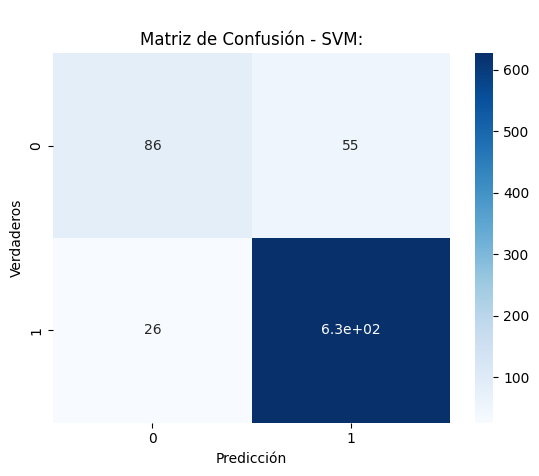

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para cada clasificador
cm1 = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - KNN:")
plt.show()

# Matriz de confusión para cada clasificador
cm2 = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Random Forest:")
plt.show()

# Matriz de confusión para cada clasificador
cm3 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - SVM:")
plt.show()

# Matriz de confusión para cada clasificador
cm4 = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm4, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - SVM:")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm, X, y, cv=5)
svm_cv_mean = svm_cv_scores.mean()

svm_cv_mean

0.8804992266712492

### Hiperparametros con GridSearch

In [60]:
from tabulate import tabulate

def display_best_params_and_score(best_params_items, best_score, modelo_name):
    # Convertir best_params en una lista de listas para tabular
    params_table = [[key, value] for key, value in best_params_items]
    
    print(f"\nMejores Hiperparámetros para {modelo_name}:")

    # Imprimir best_params con tabulate
    print(tabulate(params_table, headers=["Hiperparámetro", "Mejor Valor"]))

    # Mostrar el mejor score
    print(f"\nMejor Score: {best_score}")

In [62]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Búsqueda de grilla para KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

# Definir los hiperparámetros para la búsqueda en cuadrícula
rf_params = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
# Ejecutar la búsqueda de hiperparámetros
rf_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_rf = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

# Guardar el modelo entrenado
import joblib
joblib.dump(rf_grid.best_estimator_, '../models/cancer_survival_model-RandomForestClassifier.pkl')


# Búsqueda de grilla para SVM
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(kernel='linear', random_state=42), svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

In [63]:
# Mostrar los mejores hiperparámetros y el mejor score
display_best_params_and_score(best_knn.items(), knn_best_score, 'KNN')
display_best_params_and_score(best_rf.items(), rf_best_score,'Radom Forest')
display_best_params_and_score(best_svm.items(), svm_best_score,'SVM')




Mejores Hiperparámetros para KNN:
Hiperparámetro      Mejor Valor
----------------  -------------
n_neighbors                   7

Mejor Score: 0.8675675675675676

Mejores Hiperparámetros para Radom Forest:
Hiperparámetro       Mejor Valor
-----------------  -------------
max_depth
min_samples_leaf               1
min_samples_split             10
n_estimators                 100

Mejor Score: 0.8854054054054054

Mejores Hiperparámetros para SVM:
Hiperparámetro    Mejor Valor
----------------  -------------
C                 1
gamma             scale

Mejor Score: 0.8881106737670758


### Procederemos a generar curvas de aprendizaje para los tres modelos: KNN, Random Forest y SVM.



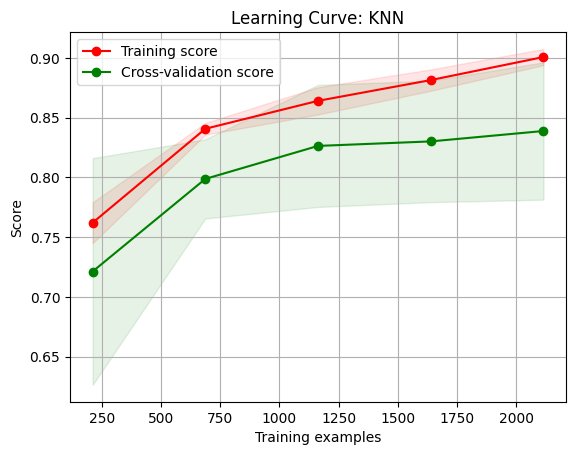

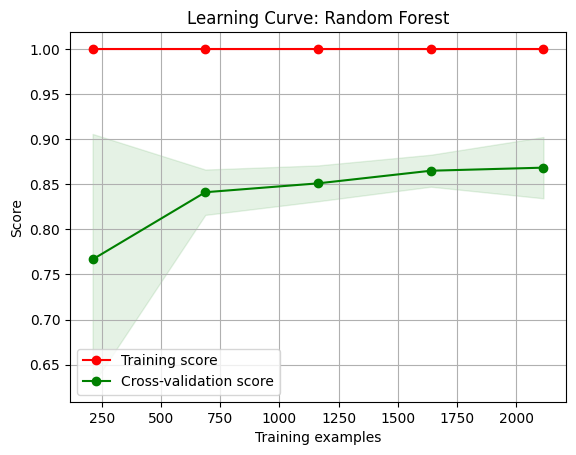

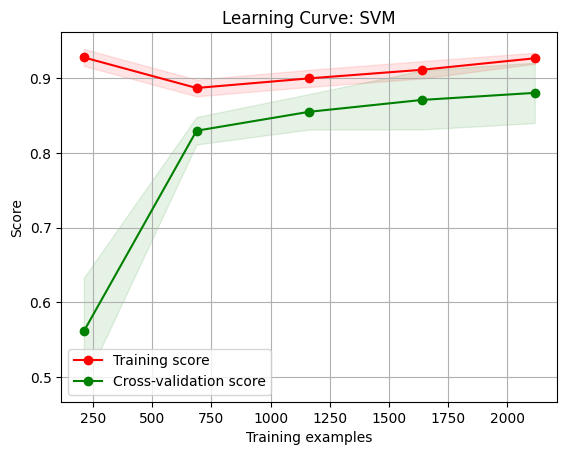

In [58]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Generar curvas de aprendizaje para los tres modelos
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), "Learning Curve: KNN", X, y, cv=5)
plot_learning_curve(RandomForestClassifier(n_estimators=100, random_state=42), "Learning Curve: Random Forest", X, y, cv=5)
plot_learning_curve(SVC(kernel='linear', random_state=42), "Learning Curve: SVM", X, y, cv=5)
plt.show()
